# Importing libraries

In [1]:
# Data processing
import numpy as np
import pandas as pd

# File system
import os

# Plot libraries
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Image libraries
from torchvision.io import read_image
import torchvision.transforms.functional as F

# Function definitions

In [2]:
# Function to display an image
def show_image(image):
    # Convert image
    image = F.to_pil_image(image)
    
    # Show image
    fig = plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)

In [3]:
# Function to plot the metrics from the dataframe created by create_dataframe_with_results_from_runs
def plot_dataframe_metrics(df, y_columns, y_labels, titles):
    for i in range(0, len(y_labels)):
        fig = go.Figure()
        fig.add_trace(go.Scatter(x = df['               epoch'], y = df[y_columns[i][0]], name = y_labels[i][0]))
        fig.add_trace(go.Scatter(x = df['               epoch'], y = df[y_columns[i][1]], name = y_labels[i][1]))
        fig.update_layout(title = titles[i])
        fig.show()

In [4]:
# Function to append all the results.csv files across experiments together
def create_dataframe_with_results_from_runs(path):
    experiments_df = pd.DataFrame()
    
    for i, dir in enumerate(np.sort(os.listdir(path))):
        df = pd.read_csv(path + str(dir) + '/results.csv')
        df['dir'] = str(dir)
        
        if i > 0:
            df['               epoch'] = 10 * (i - 1) + df['               epoch'] + 1
        
        experiments_df = pd.concat([experiments_df, df])
    
    return experiments_df

# Creating a dataframe with all the epochs (with corrected numbers)

In [5]:
path = '../input/7-great-barrier-reef-train-the-bigger-yolov5/yolov5/runs/train/'
results_df = create_dataframe_with_results_from_runs(path)

# Plotting metrics of interest through epochs

In [6]:
import plotly.graph_objects as go

y_columns = [['      train/box_loss', '        val/box_loss'], 
             ['      train/obj_loss', '        val/obj_loss'],
             ['   metrics/precision', '      metrics/recall'], 
             ['     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95']]

y_labels = [['train box loss', 'val box loss'], 
            ['train obj loss', 'val obj loss'], 
            ['val precision', 'val recall'], 
            ['val mAP 0.5', 'val mAP 0.5:0.95']]

titles = ['Box Loss @ Train and Validation Datasets', 
          'Object Loss @ Train and Validation Datasets',
          'Precision and Recall @ Validation Dataset', 
          'mAP @ Validation Dataset']

plot_dataframe_metrics(results_df, y_columns, y_labels, titles)

# Getting the experiment with the best weights

In [7]:
best_df = results_df.sort_values('metrics/mAP_0.5:0.95', ascending = False).head(1)

print('Experiment with Best mAP 0.5:0.95 -->', best_df['dir'][0])
print('Metrics for Best mAP 0.5:0.95')
best_df

Experiment with Best mAP 0.5:0.95 --> exp5
Metrics for Best mAP 0.5:0.95


,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2,dir
0,31,0.013796,0.001689,0,0.68111,0.29245,0.37813,0.19113,0.014259,0.018243,0,0.00333,0.00333,0.070031,exp5


# Plotting precision vs recall curve

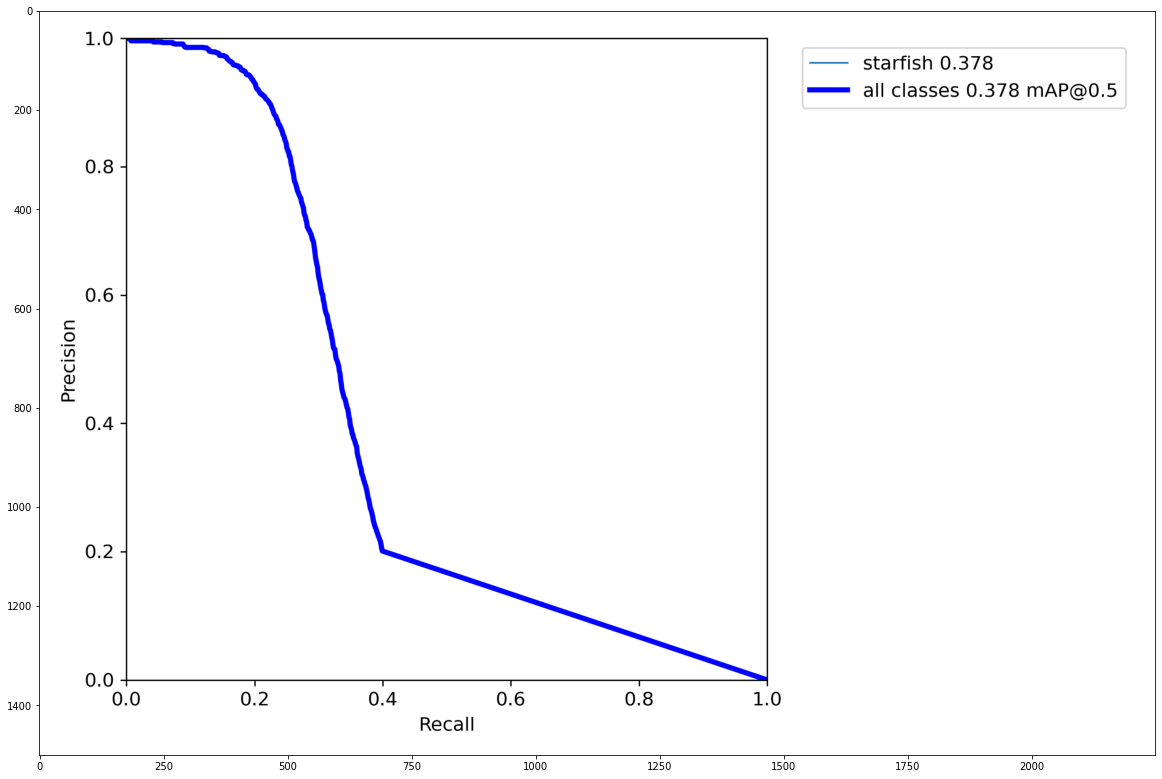

In [8]:
 show_image(read_image(path + 'exp5/PR_curve.png'))

# Plotting recall curve

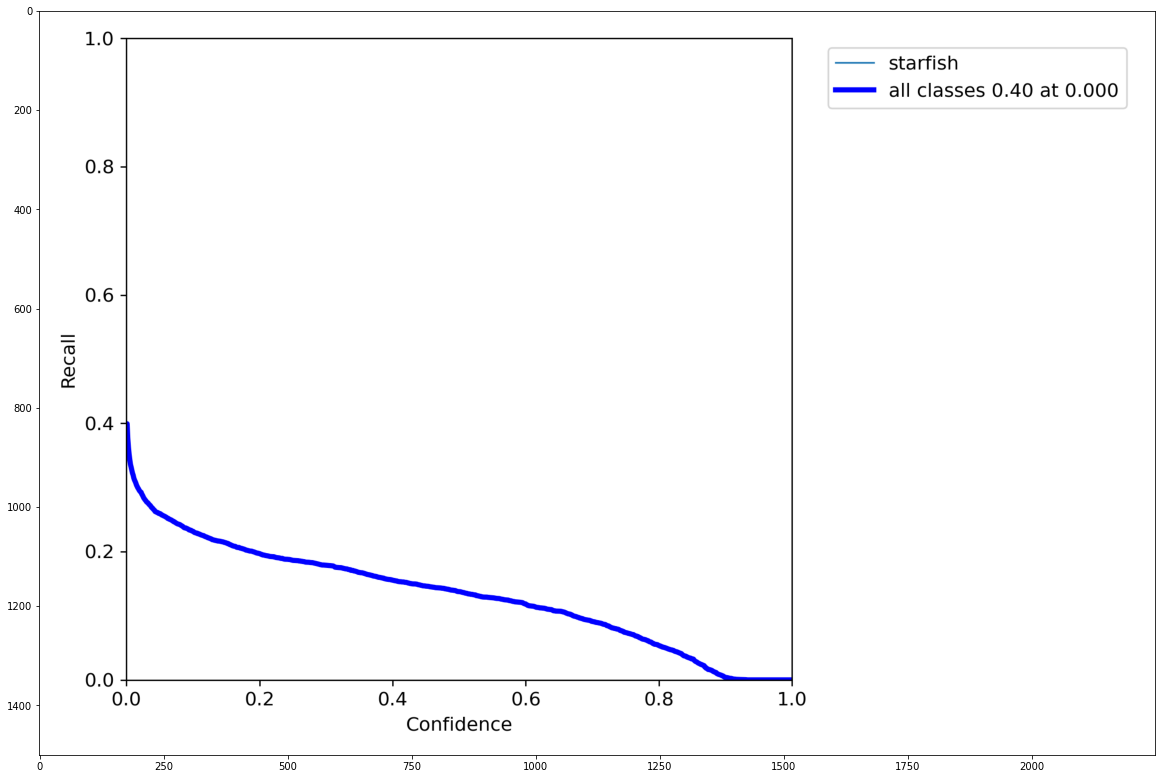

In [9]:
show_image(read_image(path + 'exp5/R_curve.png'))

# Plotting precision curve

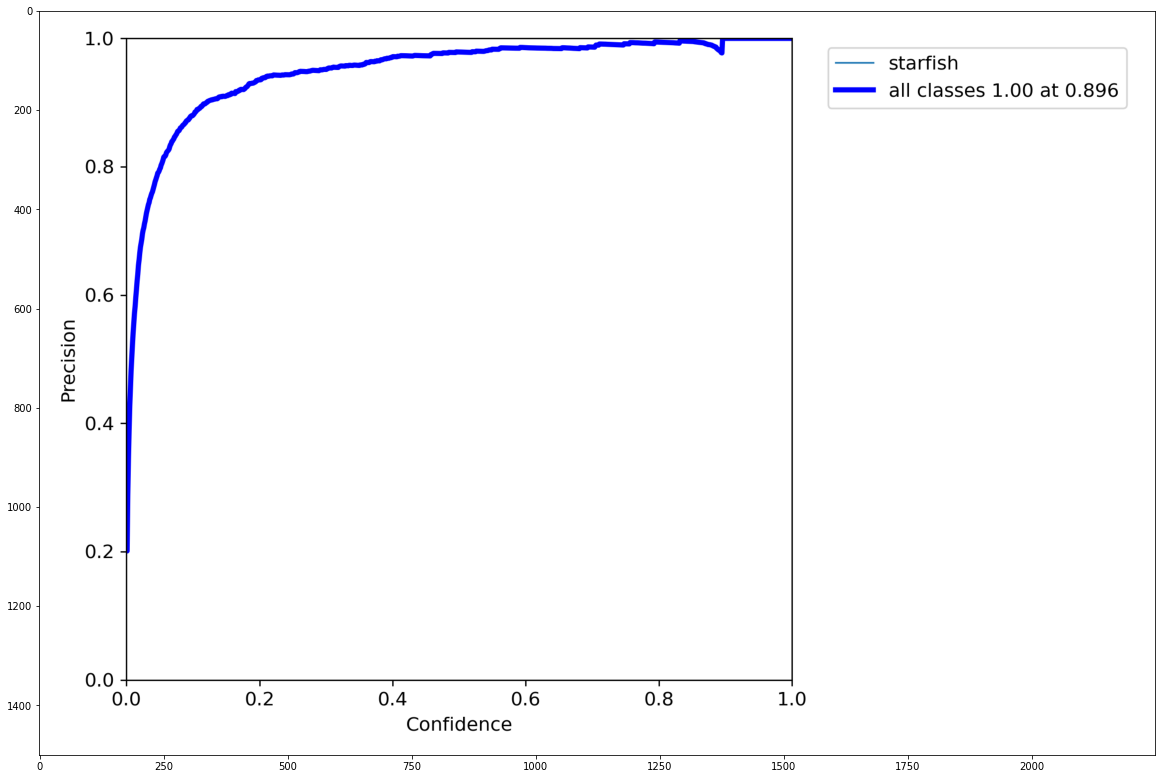

In [10]:
show_image(read_image(path + 'exp5/P_curve.png'))

# Plotting F1 curve

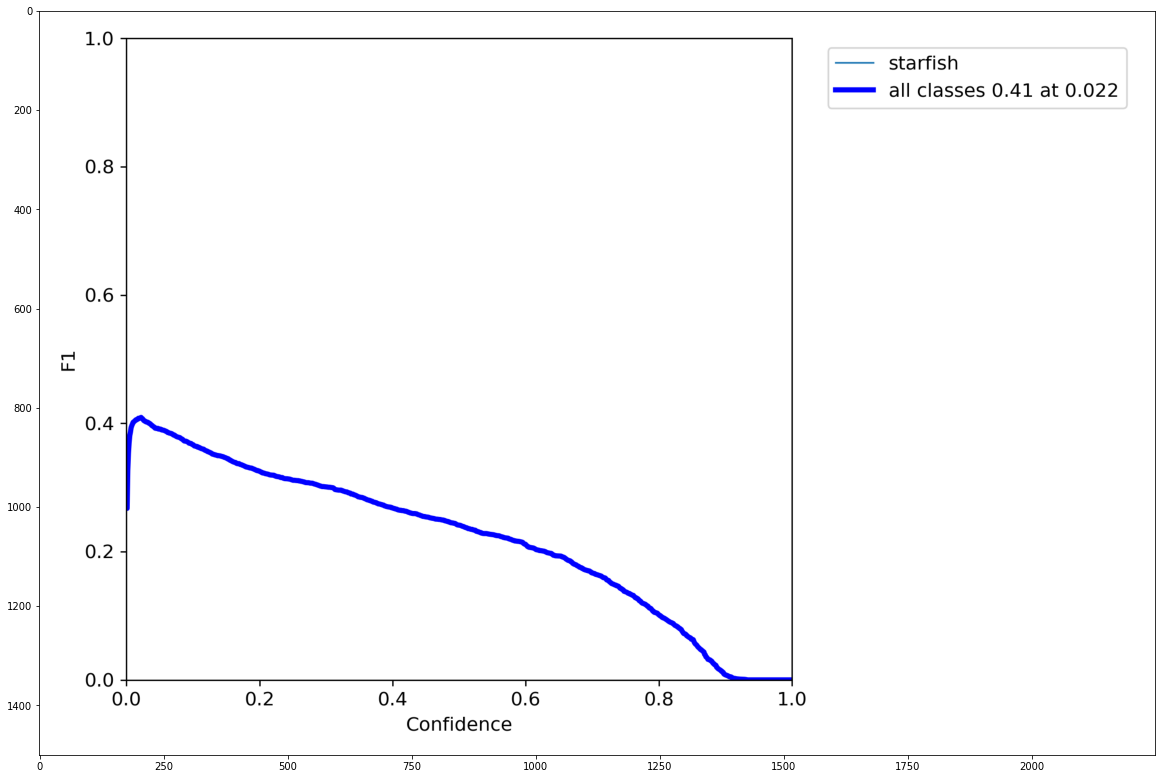

In [11]:
show_image(read_image(path + 'exp5/F1_curve.png'))